In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#read the data
data = pd.read_csv('Desktop/Udacity/raw_data.csv')

In [10]:
#calculate the deaths percentage 
data.loc[: ,'death_rate'] = data.loc[ :,'total_deaths'] * 100 / data.loc[: ,'total_cases']

## Explore Data

In [36]:
data = data.sample(frac = 1)
data.head(8)

location        date  total_cases  total_deaths  \
39820      Saudi Arabia  2020-07-04     201801.0        1802.0   
15758  Falkland Islands  2020-07-15         13.0           NaN   
30298            Mexico  2020-07-01     272653.0       27769.0   
6834             Brazil  2020-09-19    4495183.0      135793.0   
8781         Cape Verde  2020-04-18         56.0           1.0   
23833           Jamaica  2020-07-25        821.0          10.0   
29665             Malta  2020-10-03       3139.0          37.0   
40344            Serbia  2020-08-25      30714.0         701.0   

       stringency_index  population  gdp_per_capita  human_development_index  \
39820             71.30    34813867       49045.411                    0.853   
15758             19.44        3483             NaN                      NaN   
30298             70.83   128932753       17336.469                    0.774   
6834              72.69   212559409       14103.452                    0.759   
8781              79.63      555988        6222.554                    0.654   
23833             64.81     2961161        8193.571                    0.732   
29665               NaN      441539       36513.323                    0.878   
40344             58.33     6804596       14048.881                    0.787   

       death_rate  
39820    0.892959  
15758         NaN  
30298   10.184740  
6834     3.020856  
8781     1.785714  
23833    1.218027  
29665    1.178719  
40344    2.282347

In [4]:
print("This dataset has",data.shape[0],"rows and",data.shape[1],"columns")

This dataset has 50418 rows and 14 columns


In [5]:
#Provide the set of features we have 
data.columns

Index(['iso_code', 'location', 'date', 'total_cases', 'total_deaths',
       'stringency_index', 'population', 'gdp_per_capita',
       'human_development_index', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11',
       'Unnamed: 12', 'Unnamed: 13'],
      dtype='object')

## Missing Values

In [9]:
#Provide a set of columns with more than 75% of the values missing
most_missing_cols = set(data.columns[data.isnull().mean() > 0.50])

most_missing_cols

set()

In [6]:
no_missing_cols = set(data.columns[data.isnull().mean() == 0])#Provide a set of columns with more than 75% of the values missing

no_missing_cols

{'Unnamed: 10',
 'Unnamed: 11',
 'Unnamed: 12',
 'Unnamed: 13',
 'Unnamed: 9',
 'date',
 'iso_code',
 'location',
 'population'}

In [7]:
#check the null values
print(data.isnull().sum())

iso_code                       0
location                       0
date                           0
total_cases                 3094
total_deaths               11190
stringency_index            7126
population                     0
gdp_per_capita              5712
human_development_index     6202
Unnamed: 9                     0
Unnamed: 10                    0
Unnamed: 11                    0
Unnamed: 12                    0
Unnamed: 13                    0
dtype: int64


In [3]:
#Drop Unamed columns and ISO code 
data.drop(['iso_code', "Unnamed: 9", 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13'], axis=1, inplace=True)

In [13]:
#Drop the rows that have missing values
data.dropna(inplace=True)

In [9]:
data.shape

(50418, 8)

In [12]:
#check the null values
print(data.isnull().sum())

location                       0
date                           0
total_cases                 3094
total_deaths               11190
stringency_index            7126
population                     0
gdp_per_capita              5712
human_development_index     6202
Unnamed: 9                     0
Unnamed: 10                    0
dtype: int64


In [10]:
#check the type of each feature
data.dtypes

location                    object
date                        object
total_cases                float64
total_deaths               float64
stringency_index           float64
population                   int64
gdp_per_capita             float64
human_development_index    float64
dtype: object

In [4]:
#Save a dataframe that holds the last number of cases and deaths for each country and put it in total variable 
total = data.sort_values('date').groupby('location').tail(1)
#Save the new dataframe (total) on local machine
total.to_csv('Desktop/Udacity/total.csv')

In [5]:
total.head()

location        date  total_cases  total_deaths  stringency_index  \
20903  Hong Kong  2020-10-13          NaN           NaN               NaN   
44295     Sweden  2020-10-16     103200.0        5918.0             37.04   
4858     Belgium  2020-10-17     222126.0       10409.0             43.52   
43057      Spain  2020-10-18     936560.0       33775.0               NaN   
27174      Libya  2020-10-19      48790.0         725.0             80.56   

       population  gdp_per_capita  human_development_index  
20903     7496988       56054.920                    0.933  
44295    10099270       46949.283                    0.933  
4858     11589616       42658.576                    0.916  
43057    46754783       34272.360                    0.891  
27174     6871287       17881.509                    0.706

In [6]:
#calculate the deaths percentage 
total.loc[: ,'death_rate'] = total.loc[ :,'total_deaths'] * 100 / total.loc[: ,'total_cases']

total.drop(['stringency_index', 'gdp_per_capita',  'human_development_index'], axis=1, inplace=True)
total.dropna(inplace=True)

In [8]:
total.head()

location        date  total_cases  total_deaths  population  death_rate
44295   Sweden  2020-10-16     103200.0        5918.0    10099270    5.734496
4858   Belgium  2020-10-17     222126.0       10409.0    11589616    4.686079
43057    Spain  2020-10-18     936560.0       33775.0    46754783    3.606283
27174    Libya  2020-10-19      48790.0         725.0     6871287    1.485960
18673   Greece  2020-10-19      25370.0         509.0    10423056    2.006307

<AxesSubplot:xlabel='total_deaths', ylabel='location'>

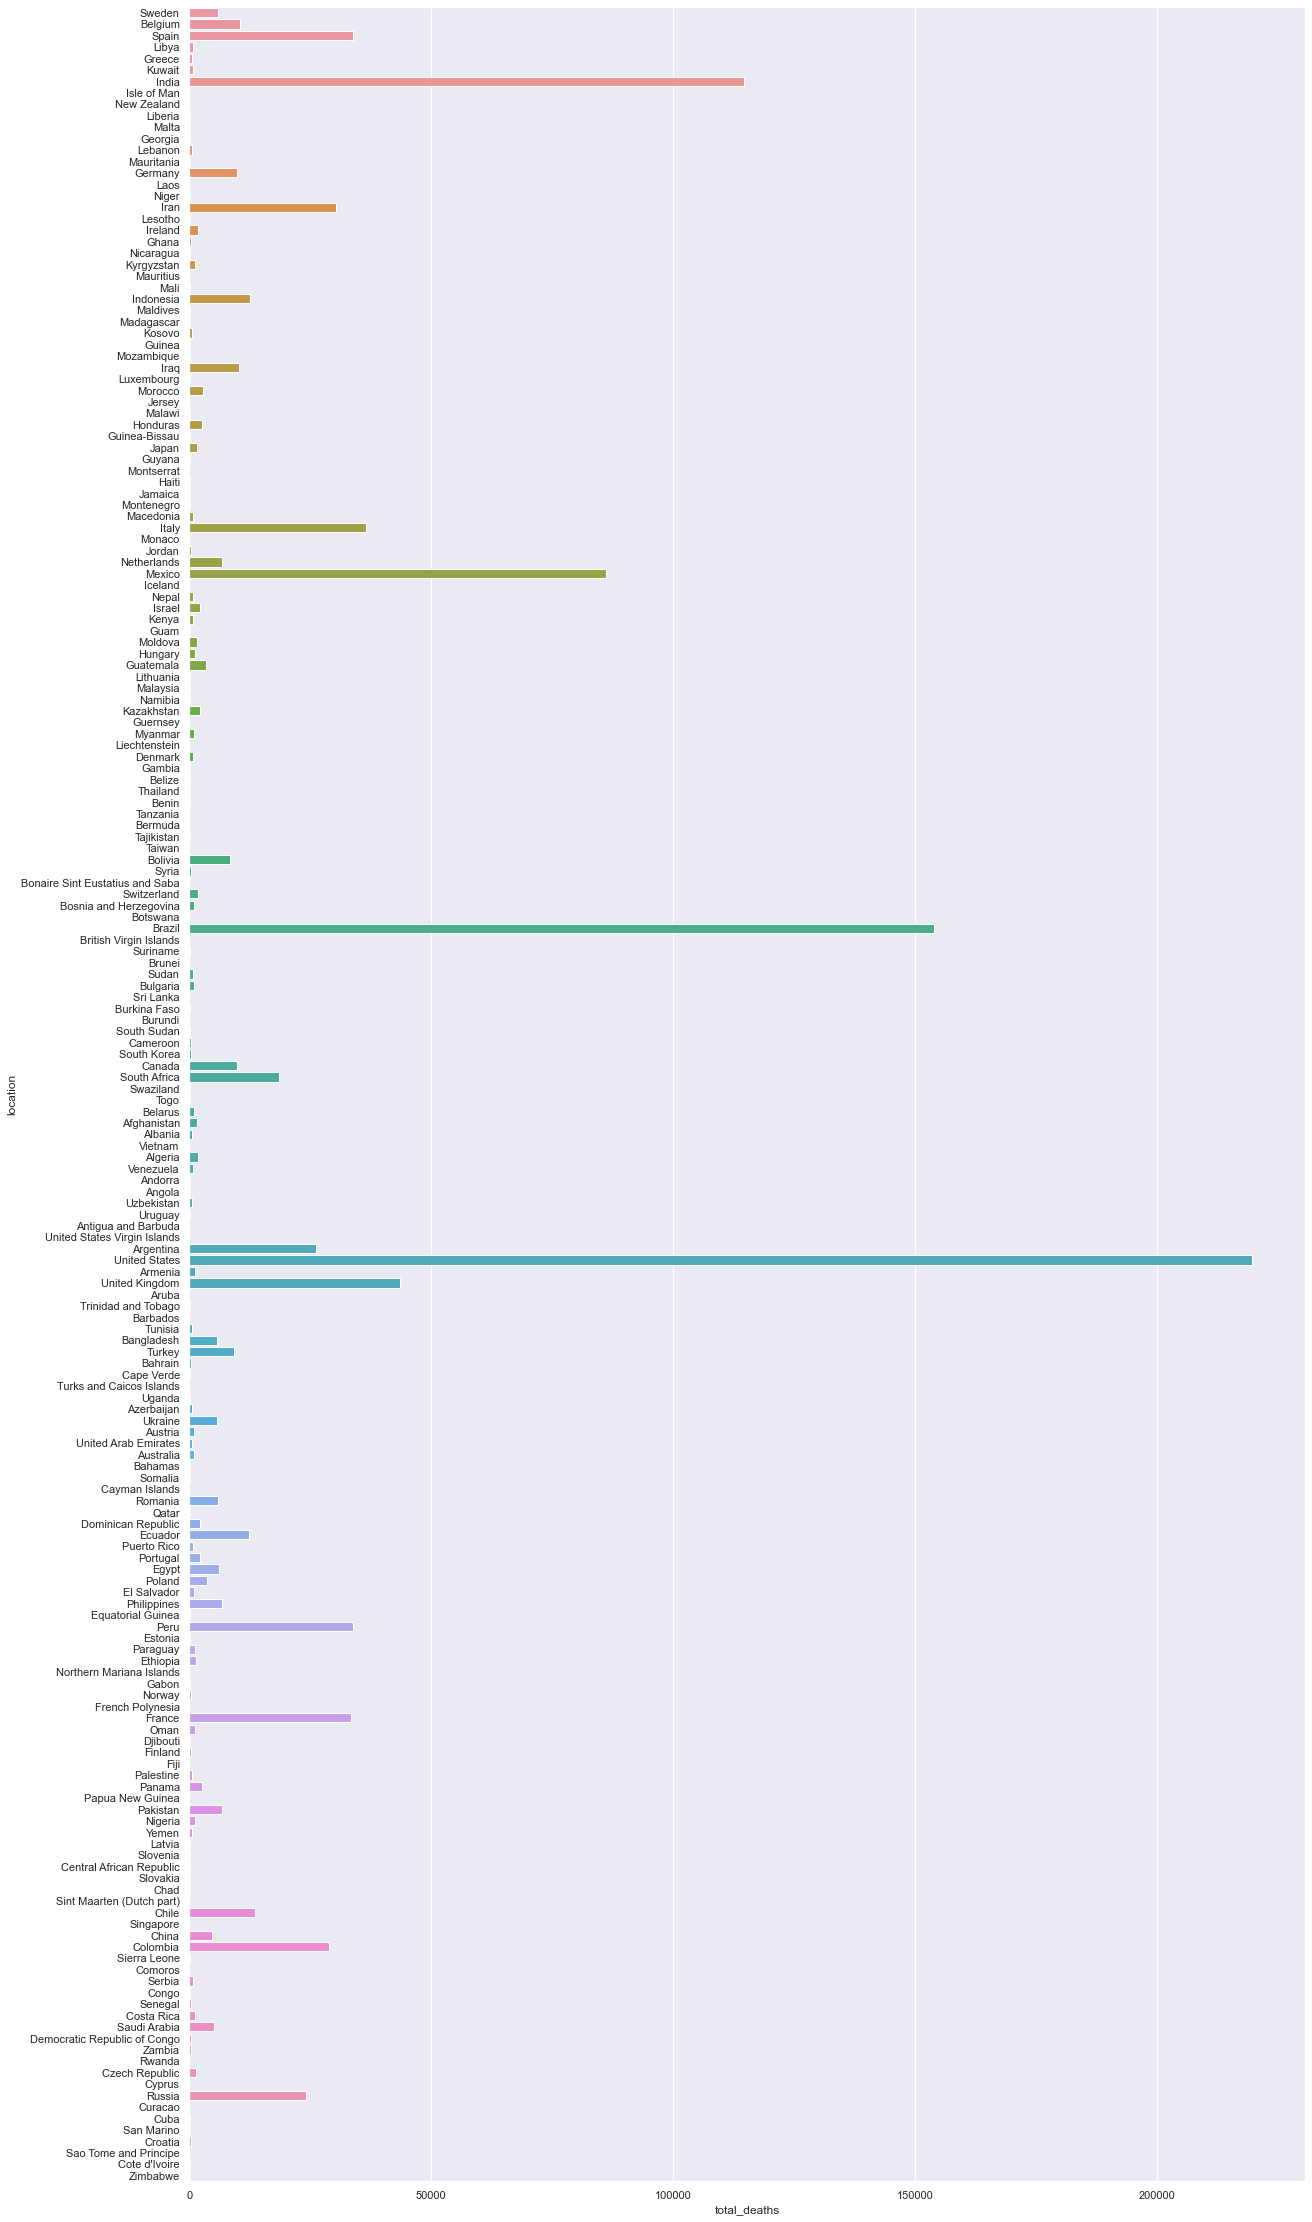

In [90]:
sns.set(rc={'figure.figsize':(20,40)})
sns.barplot(x='total_deaths', y='location', data=total)

In [106]:
fig = px.scatter(total, x='location', y='total_deaths', color='location',  hover_data=['total_deaths', "location"])
fig.show()

In [105]:
fig = px.scatter(total, x='location', y='total_cases', color='location',  hover_data=['total_cases', "location"])
fig.show()

<AxesSubplot:>

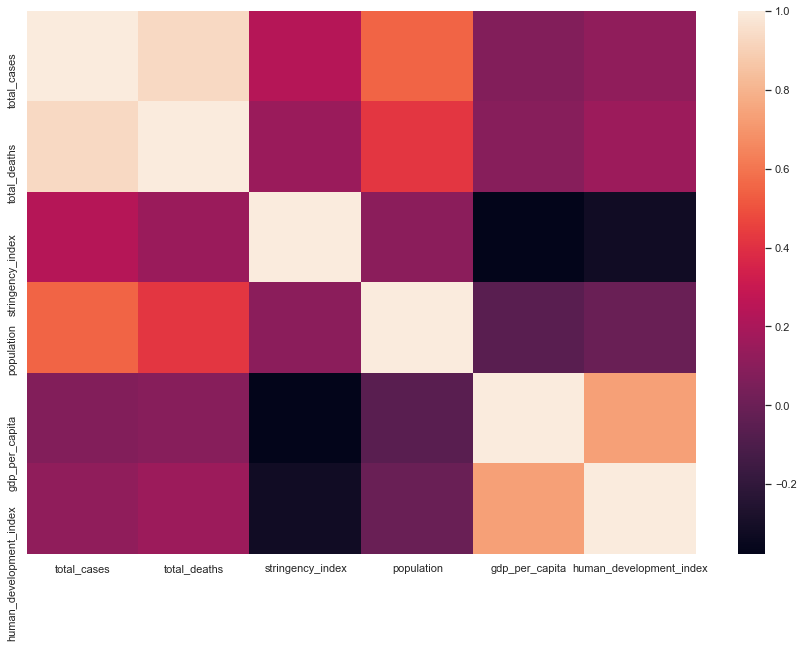

In [112]:
plt.subplots(figsize=(15,10))

sns.heatmap(total.corr())

In [16]:


fig = px.scatter(data, x="date", y="total_cases",color="location",width=1200, height=900,
                 title="COVID-19 cases total by country",
                 hover_data=['date', "location"])
fig.show()

In [34]:
fig = px.bar(x=total['location'], y=total['death_rate'], color=total['location'],
             labels=dict(x="Country", y="CFR", color="Country"))
fig.show()